# A description of the problem and a discussion of the background.

Dehradun is a place which is located in beautiful hills of uttarakhand , the place is also a hub for colleges, offices , universities etc due to which there is also a demand for food. This food demand can be cater with the restaurants and hotels. As there are lots of food corners and restaurants, my aim is to find a suitable location to open my own restaurant.

# A description of the data and how it will be used to solve the problem 

I have used the data completely from the foursquare and explore the areas and venues, i then use the locations such as school , colleges , offices , universities ,cinema etc  as these places are full of crowd , i then locate a suitable location through machine learning for opening a new restaurant.

# Methodology section

all the libraries are imported in the first place and then use the search query as mentioned in the lectures. all the venues are located and finally distance of the venues are plotted. again the final list of venues is prepared and use the k-clustering algorithm to get a location of a new restaurant. 




In [29]:

# Import libraries
import numpy as np # data in a vectorized manner manipulation
import pandas as pd # data analsysis
import requests # HTTP library
from bs4 import BeautifulSoup # scraping library

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json # JSON files manipulation

from sklearn.cluster import KMeans # clustering algorithm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

Solving environment: ...working... done

# All requested packages already installed.


C:\Users\HP\Desktop\projects>set "KERAS_BACKEND=" 

C:\Users\HP\Desktop\projects>python C:\Users\HP\anaconda3\etc\keras\load_config.py  1>temp.txt 

C:\Users\HP\Desktop\projects>set /p KERAS_BACKEND= 0<temp.txt 

C:\Users\HP\Desktop\projects>del temp.txt 

C:\Users\HP\Desktop\projects>python -c "import keras"  1>nul 2>&1 

C:\Users\HP\Desktop\projects>if errorlevel 1 (
ver  1>nul  
 set "KERAS_BACKEND=theano"  
 python -c "import keras"  1>nul 2>&1 
) 

C:\Users\HP\Desktop\projects>SET DISTUTILS_USE_SDK=1 

C:\Users\HP\Desktop\projects>SET MSSdk=1 

C:\Users\HP\Desktop\projects>SET platform= 

C:\Users\HP\Desktop\projects>IF /I [AMD64] == [amd64] set "platform=true" 

C:\Users\HP\Desktop\projects>IF /I [] == [amd64] set "platform=true" 

C:\Users\HP\Desktop\projects>if defined platform (set "VSREGKEY=HKEY_LOCAL_MACHINE\SOFTWARE\Wow6432Node\Microsoft\VisualStudio\14.0" )  ELSE (set "VSREGKEY=HKEY_LOCA

ERROR: The system was unable to find the specified registry key or value.
The system cannot find the batch label specified - End


Solving environment: ...working... done

# All requested packages already installed.


C:\Users\HP\Desktop\projects>set "KERAS_BACKEND=" 

C:\Users\HP\Desktop\projects>python C:\Users\HP\anaconda3\etc\keras\load_config.py  1>temp.txt 

C:\Users\HP\Desktop\projects>set /p KERAS_BACKEND= 0<temp.txt 

C:\Users\HP\Desktop\projects>del temp.txt 

C:\Users\HP\Desktop\projects>python -c "import keras"  1>nul 2>&1 

C:\Users\HP\Desktop\projects>if errorlevel 1 (
ver  1>nul  
 set "KERAS_BACKEND=theano"  
 python -c "import keras"  1>nul 2>&1 
) 

C:\Users\HP\Desktop\projects>SET DISTUTILS_USE_SDK=1 

C:\Users\HP\Desktop\projects>SET MSSdk=1 

C:\Users\HP\Desktop\projects>SET platform= 

C:\Users\HP\Desktop\projects>IF /I [AMD64] == [amd64] set "platform=true" 

C:\Users\HP\Desktop\projects>IF /I [] == [amd64] set "platform=true" 

C:\Users\HP\Desktop\projects>if defined platform (set "VSREGKEY=HKEY_LOCAL_MACHINE\SOFTWARE\Wow6432Node\Microsoft\VisualStudio\14.0" )  ELSE (set "VSREGKEY=HKEY_LOCA

ERROR: The system was unable to find the specified registry key or value.
The system cannot find the batch label specified - End


In [30]:
CLIENT_ID = '5OQS3DYASM0FO30W2HBCLK45VLGTKYE2UYDIXHITZHTTUOZN' # your Foursquare ID
CLIENT_SECRET = 'O0JUA2N4RSDAS0YUS3XSL2GUNK1SV0HIVUVL0NCJ4WRTH503' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5OQS3DYASM0FO30W2HBCLK45VLGTKYE2UYDIXHITZHTTUOZN
CLIENT_SECRET:O0JUA2N4RSDAS0YUS3XSL2GUNK1SV0HIVUVL0NCJ4WRTH503


In [31]:
#Location of the place
address = 'Dehradun, Uttarakhand'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

30.3255646 78.0436813


In [32]:
#search queries within 1kms radius 
search_query = 'hotel'
search_query_res = 'restaurant'
Search_query_food='food'

radius =1000
url_hotel = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url_restaurant = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query_res, radius, LIMIT)
url_food_court = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, Search_query_food, radius, LIMIT)



In [33]:
#GET Request of hotel,restaurants and food courts
results_hotel = requests.get(url_hotel).json()
results_restaurant = requests.get(url_restaurant).json()
results_food = requests.get(url_food_court).json()

In [34]:
# assign relevant part of JSON to venues
venues_hotel = results_hotel['response']['venues']
venues_restaurant = results_restaurant['response']['venues']
venues_food_court = results_food['response']['venues']
# tranform venues into a dataframe
df_hotel = json_normalize(venues_hotel)
df_restaurant = json_normalize(venues_restaurant)
df_food_court = json_normalize(venues_food_court)
dataframe = pd.concat([df_hotel,df_restaurant,df_food_court])
print("There are {} hotels at Dehradun".format(df_hotel.shape[0]))
print("There are {} restaurant at Dehradun".format(df_restaurant.shape[0]))
print("There are {} food_court at Dehradun".format(df_food_court.shape[0]))
print("There are {} restaurants,hotels and food_court at Dehradun".format(dataframe.shape[0]))
df_hotel.head()

There are 15 hotels at Dehradun
There are 7 restaurant at Dehradun
There are 3 food_court at Dehradun
There are 25 restaurants,hotels and food_court at Dehradun


C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.formattedAddress,location.address,location.postalCode,location.city,location.state,location.crossStreet
0,5069d5aae4b033d3592c325a,Hotel Ambassder,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1587726372,False,30.325603,78.043068,"[{'label': 'display', 'lat': 30.32560348510742...",59,IN,India,[India],NaN,NaN,NaN,NaN,NaN
1,4bb75bbc1344b7137e9d9e04,Suzi Wong Hotel Chukkuwala Dehradun,[],v-1587726372,False,30.324887,78.042779,"[{'label': 'display', 'lat': 30.324887, 'lng':...",114,IN,India,[India],NaN,NaN,NaN,NaN,NaN
2,50b47f8ee4b01bf381b1eeb3,Hotel Godavri,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1587726372,False,30.328631,78.045447,"[{'label': 'display', 'lat': 30.3286307, 'lng'...",381,IN,India,[India],NaN,NaN,NaN,NaN,NaN
3,4c46b9e489a6c9b6bcf89788,"Hotel President, Dehradun","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1587726372,False,30.327966,78.046144,"[{'label': 'display', 'lat': 30.32796557396999...",356,IN,India,[India],NaN,NaN,NaN,NaN,NaN
4,4bb6ab7ef562ef3b0b953097,Hotel Paciific Cafetaria,[],v-1587726372,False,30.327194,78.048266,"[{'label': 'display', 'lat': 30.327194, 'lng':...",476,IN,India,[India],NaN,NaN,NaN,NaN,NaN


In [35]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

    
# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

  
# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

#dataframe_filtered
hotels_df=dataframe_filtered[['name','categories','distance','lat','lng','id']]
hotels_df.head(25)

,name,categories,distance,lat,lng,id
0,Hotel Ambassder,Hotel,59,30.325603,78.043068,5069d5aae4b033d3592c325a
1,Suzi Wong Hotel Chukkuwala Dehradun,None,114,30.324887,78.042779,4bb75bbc1344b7137e9d9e04
2,Hotel Godavri,Indian Restaurant,381,30.328631,78.045447,50b47f8ee4b01bf381b1eeb3
3,"Hotel President, Dehradun",Hotel,356,30.327966,78.046144,4c46b9e489a6c9b6bcf89788
4,Hotel Paciific Cafetaria,None,476,30.327194,78.048266,4bb6ab7ef562ef3b0b953097
5,Hotel Relax,Hotel,622,30.320165,78.041987,551d4f11498e7ada62d1d50e
6,Hotel Inderlok,Hotel,543,30.329989,78.046066,5166ad3ee4b0639dffe3b6ec
7,Pacific Hotel,Hotel,489,30.327179,78.048423,4d5e3a0bef378cfa74e75ea6
8,Hotel Doonga,Bed & Breakfast,866,30.327272,78.052483,535d1ff9498e3de2365605e1
9,Hotel Regent,Hotel,1009,30.317616,78.048744,52f57e7111d24e7e6562bab3


In [36]:

#location on map

venues_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add a red circle marker to represent the Dehradun Location
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Dehradun',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the restaurants, hotels  and food_court as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

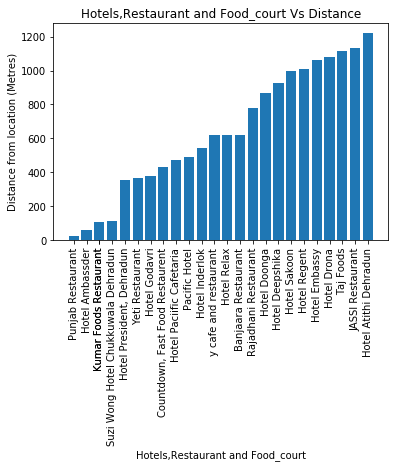

Average distance between Hotels,Restaurant and Food_court from core location is 620 metres


In [37]:
#plot bar chart for the venues and core location
distance_hotel_df=dataframe_filtered[['name','categories','distance','lat','lng']].sort_values('distance')

def plot_bar_x():
    index = np.arange(len(distance_hotel_df.name))
    plt.bar(distance_hotel_df.name, distance_hotel_df.distance)
    plt.xlabel('Hotels,Restaurant and Food_court')
    plt.ylabel('Distance from location (Metres)')
    plt.xticks(distance_hotel_df.name,rotation=90)
    plt.title('Hotels,Restaurant and Food_court Vs Distance')
    plt.show()
plot_bar_x()

print("Average distance between Hotels,Restaurant and Food_court from core location is {} metres".format(int(sum(hotels_df['distance'])/hotels_df.shape[0])))

In [38]:
#Other venues search

url_explore = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)

In [39]:
import requests
results_explore = requests.get(url_explore).json()
'There are {} areas around the locations.'.format(len(results_explore['response']['groups'][0]['items']))

'There are 10 areas around the locations.'

In [40]:
items_explore = results_explore['response']['groups'][0]['items']
items_explore[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4f25382de4b04f6e69faddc5',
  'name': 'The Buffet',
  'location': {'address': 'Rajpur Rd, Dehradun, Uttaranchal',
   'lat': 30.327035875573273,
   'lng': 78.04521891913448,
   'labeledLatLngs': [{'label': 'display',
     'lat': 30.327035875573273,
     'lng': 78.04521891913448}],
   'distance': 220,
   'cc': 'IN',
   'city': 'Dehradun',
   'state': 'Uttarakhand',
   'country': 'India',
   'formattedAddress': ['Rajpur Rd, Dehradun, Uttaranchal',
    'Dehradun',
    'Uttarakhand',
    'India']},
  'categories': [{'id': '4bf58dd8d48988d16e941735',
    'name': 'Fast Food Restaurant',
    'pluralName': 'Fast Food Restaurants',
    'shortName': 'Fast Food',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'groups': []}},
 'referralI

In [41]:
dataframe_venues = json_normalize(items_explore) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe_venues.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered_venues = dataframe_venues.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered_venues['venue.categories'] = dataframe_filtered_venues.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered_venues.columns = [col.split('.')[-1] for col in dataframe_filtered_venues.columns]

dataframe_filtered_venues.name

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


0                         The Buffet
1    Ellora Bakers And Confectioners
2                       Black Pepper
3                       Kumar Sweets
4                      Paltan Bazaar
5                     Baskin-Robbins
6                         McDonald's
7                    Barista Lavazza
8                             Subway
9                    cafe coffee day
Name: name, dtype: object

In [42]:
# search other query list targeted the populated places 
search_query_list = ['temple','church','park','bazaar','stores','university','school','college','academy','institute','store','office','cinema'] 
radius =1000
temp_df=[]
search_df=[]

def search_query_fn():   
    #Loop to run through urls and from json to pandas
    for i in range(len(search_query_list)):
        url= 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query_list[i], radius, LIMIT)
        
        results=requests.get(url).json()
        venues = results['response']['venues']
        
        #Normalize from json
        dataframe = json_normalize(venues)
        
        #Removing unwanted column headers
        dataframe.columns = [col.split('.')[-1] for col in dataframe.columns]
        temp_df.append(dataframe)
    
    #Loop to append dataframes to single dataframe
    for j in range(len(search_query_list)):
        data=temp_df[j]
        search_df.append(data)

# Function to run loop over queries
search_query_fn()

search_df = pd.concat(search_df,sort=True)
search_df['categories'] = search_df.apply(get_category_type, axis=1)
search_df = pd.DataFrame(search_df[['name','categories','distance','lat','lng','id']])
search_df

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,distance,lat,lng,id
0,St. John The Evangelist church,Church,591,30.320725,78.041139,508773d1e4b096443c1fe2e1
0,Gandhi Park,Park,383,30.327067,78.047270,51d0db64498e1c66f1e44036
0,Big Bazaar @ Kumar Tower,Department Store,155,30.326675,78.044658,543230cd498e491cf00a2181
1,Paltan Bazaar,Flea Market,404,30.323127,78.040562,4ef8512d8231c111572a8e05
0,Kumar Stores,Convenience Store,351,30.328159,78.045771,4e7c2f6429c2e440a8b7fcb6
1,Centre Stores,Butcher,440,30.328831,78.046272,563b3843cd100c2a70597edb
0,University of Petroleum and Energy Studies,College Engineering Building,121,30.324953,78.044729,55388a0d498e339377d62345
1,University of Petroleum and Energy Studies,College Engineering Building,229,30.324693,78.045845,55388a56498e96e74609cbe9
2,Grafic era university,College Engineering Building,605,30.325090,78.037399,5281c65611d24b9fced28689
0,Ecole Globale Girls School,Student Center,7,30.325627,78.043708,5cb59ee13abcaf002cd8317c


In [43]:

# Data extracted from search queries
df_venue=pd.DataFrame(search_df)


In [44]:
#drop the unkown and inwanted query
to_drop =['Butcher','butcher']
df_venues = df_venue[~df_venue['categories'].str.contains('|'.join(to_drop))].reset_index()
print("There are {} venues in Dehradun".format(df_venues.shape[0]))
df_venues[['name','categories','distance','id']]

There are 23 venues in Dehradun


,name,categories,distance,id
0,St. John The Evangelist church,Church,591,508773d1e4b096443c1fe2e1
1,Gandhi Park,Park,383,51d0db64498e1c66f1e44036
2,Big Bazaar @ Kumar Tower,Department Store,155,543230cd498e491cf00a2181
3,Paltan Bazaar,Flea Market,404,4ef8512d8231c111572a8e05
4,Kumar Stores,Convenience Store,351,4e7c2f6429c2e440a8b7fcb6
5,University of Petroleum and Energy Studies,College Engineering Building,121,55388a0d498e339377d62345
6,University of Petroleum and Energy Studies,College Engineering Building,229,55388a56498e96e74609cbe9
7,Grafic era university,College Engineering Building,605,5281c65611d24b9fced28689
8,Ecole Globale Girls School,Student Center,7,5cb59ee13abcaf002cd8317c
9,Ferger Junior High School,Middle School,817,5c0cd080a0215b002c56fabb


In [45]:
#map for venues 
venues_map = folium.Map(location=[latitude, longitude], zoom_start=16) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Dehradun
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Dehradun',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# Venues as blue circle markers
for lat, lng, label in zip(df_venues.lat, df_venues.lng, df_venues.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        #popup=label,
        fill = True,
        fill_color='black',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

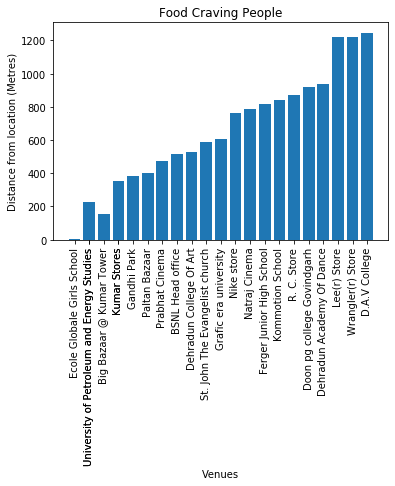

In [46]:
#distance of the venues from the core location
distance_venues_df=df_venues.sort_values('distance')

def plot_bar_venue():
    # this is for plotting purpose
    index = np.arange(len(distance_venues_df.name))
    plt.bar(distance_venues_df.name, distance_venues_df.distance)
    plt.xlabel('Venues')
    plt.ylabel('Distance from location (Metres)')
    plt.xticks(distance_venues_df.name,rotation=90)
    plt.title('Food Craving People')
    plt.show()
plot_bar_venue()

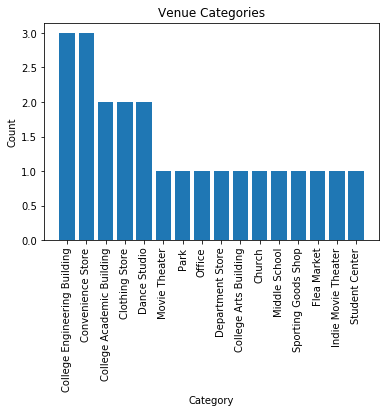

In [47]:
# plot the venue categeories 
freq_venue=df_venues['categories'].value_counts()
freq_venue=pd.DataFrame(freq_venue).reset_index()
freq_venue.columns=['Category','Count']
freq_venue

def plot_bar_categ():
    # this is for plotting purpose
    index = np.arange(len(freq_venue.Category))
    plt.bar(freq_venue.Category, freq_venue.Count)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(freq_venue.Category,rotation=90)
    plt.title('Venue Categories')
    plt.show()
plot_bar_categ()


In [48]:
#Final list of venues
df_final=df_venues[['name','categories','distance','id','lat','lng']]

In [49]:
df_final.head()

,name,categories,distance,id,lat,lng
0,St. John The Evangelist church,Church,591,508773d1e4b096443c1fe2e1,30.320725,78.041139
1,Gandhi Park,Park,383,51d0db64498e1c66f1e44036,30.327067,78.047270
2,Big Bazaar @ Kumar Tower,Department Store,155,543230cd498e491cf00a2181,30.326675,78.044658
3,Paltan Bazaar,Flea Market,404,4ef8512d8231c111572a8e05,30.323127,78.040562
4,Kumar Stores,Convenience Store,351,4e7c2f6429c2e440a8b7fcb6,30.328159,78.045771


In [50]:
#K-clustering of the data
neighbor_onehot = pd.get_dummies(df_final[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
neighbor_onehot['name'] = df_final['name'] 

# move neighborhood column to the first column
fixed_columns = [neighbor_onehot.columns[-1]] + list(neighbor_onehot.columns[:-1])
neighbor_onehot = neighbor_onehot[fixed_columns]

neighbor_onehot.head()

,name,Church,Clothing Store,College Academic Building,College Arts Building,College Engineering Building,Convenience Store,Dance Studio,Department Store,Flea Market,Indie Movie Theater,Middle School,Movie Theater,Office,Park,Sporting Goods Shop,Student Center
0,St. John The Evangelist church,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Gandhi Park,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Big Bazaar @ Kumar Tower,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,Paltan Bazaar,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Kumar Stores,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [51]:
neighbor_onehot.shape
neighbor_grouped = neighbor_onehot.groupby('name').mean().reset_index()

In [52]:
# Top 10 venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['name'] = neighbor_grouped['name']

In [53]:
# Clustering

# set number of clusters
kclusters =5

neighbor_grouped_clustering = neighbor_grouped.drop('name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(neighbor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Deepankar', kmeans.labels_)

neighbor_merged = df_final

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
neighbor_merged = neighbor_merged.join(neighborhoods_venues_sorted.set_index('name'), on='name')

kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [54]:
#My final location based on clustering
fin=neighbor_merged.groupby(['Deepankar']).mean()

lati=sum(fin.lat)/len(fin.lat)
longi=sum(fin.lng)/len(fin.lng)

#Taking midpoint of top ten closest hotel
venues_lan=sum(df_final.lat)/len(df_final.lat)
venues_lng=sum(df_final.lng)/len(df_final.lng)

final_latitude=(lati+venues_lan)/2
final_longitude=(longi+venues_lng)/2

print("Final location (Green Dot in our below given map) of ourRestaurant:{},{}".format(final_latitude,final_longitude))

Final location (Green Dot in our below given map) of ourRestaurant:30.32717340574716,78.04479388316341


In [55]:
#map showing the restaurant location in yellow dot

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=17)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

folium.features.CircleMarker(
    [final_latitude, final_longitude],
    radius=15,
    color='red',
    popup='My Restaurant',
    fill = True,
    fill_color = 'Green',
    fill_opacity = 0.8
).add_to(map_clusters)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighbor_merged['lat'], neighbor_merged['lng'], neighbor_merged['name'], neighbor_merged['Deepankar']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

       
map_clusters

# result
The final location of my restaurant , which is very near to core location

# Discussion
As i have used the data of foursquare , but some venues are missing form the search, those venies can be included in the venue list in order to get a best location of opening a restaurant.

# conclusion
The result of the final location is near to the core location and also one can attract lot of food craving crowd in the location so as to earn more money.
